# I used TMDb movie data to do this project

### Introduction

#### This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. 
● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

#### From this dataset I could try to solve many questions like:
- Which genres are most popular from year to year?
- What kind of properties are associated with movies that have high revenues?
- What are the most voted movies according to the audience votes?
- Who are the most profitables directors?
- Who are the actors that have participated in more movies?
- What are the top 10 movies with lower budget and higher voting?
- Does all the movies have revenue?
- Which are the top 5 productions that receive the most revenues?
- Does all the movies have budget for their production?
- Which are the top 5 productiones that have invested the most?
- What are the longest runtime films?
- What were the 10 movies that got the most audience votes and highest average vote scores?
- Are the movies getting more profits over the years?
- Is there any relationship between budget per movie and vote average?  
- What´s the percentage of movies that had negative, cero and positive profits?




### For the analysis included in the notebook I have choosen to look at he following question:


1) What were the 10 movies that got the most audience votes and highest average vote scores?, And, Will I get the same results if I change the order and I set the votes averages first?
 
2) Are the movies getting more profits over the years?
 
3) Is there any relationship between budget per movie and vote average?  

4) What´s the percentage of movies that had negative, cero and positive profits?




--------------------------------------------------


## And this is my code

................

In [513]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In [514]:
df = pd.read_csv('tmdb-movies.csv')

In [515]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [517]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,10856,10857,10858,10859,10860,10861,10862,10863,10864,10865
id,135397,76341,262500,140607,168259,281957,87101,286217,211672,150540,...,20277,5921,31918,20620,5060,21,20379,39768,21449,22293
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852,tt1663202,tt1340138,tt3659388,tt2293640,tt2096673,...,tt0061135,tt0060748,tt0060921,tt0060955,tt0060214,tt0060371,tt0060472,tt0060161,tt0061177,tt0060666
popularity,32.985763,28.419936,13.112507,11.173104,9.335014,9.1107,8.654359,7.6674,7.404165,6.326804,...,0.140934,0.131378,0.317824,0.089072,0.087034,0.080598,0.065543,0.065141,0.064317,0.035919
budget,150000000,150000000,110000000,200000000,190000000,135000000,155000000,108000000,74000000,175000000,...,0,0,0,0,0,0,0,0,0,19000
revenue,1513528810,378436354,295238201,2068178225,1506249360,532950503,440603537,595380321,1156730962,853708609,...,0,0,0,0,0,0,0,0,0,0
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7,The Revenant,Terminator Genisys,The Martian,Minions,Inside Out,...,The Ugly Dachshund,Nevada Smith,"The Russians Are Coming, The Russians Are Coming",Seconds,Carry On Screaming!,The Endless Summer,Grand Prix,Beregis Avtomobilya,"What's Up, Tiger Lily?",Manos: The Hands of Fate
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,...,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,Rock Hudson|Salome Jens|John Randolph|Will Gee...,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Michael Hynson|Robert August|Lord 'Tally Ho' B...,James Garner|Eva Marie Saint|Yves Montand|Tosh...,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Harold P. Warren|Tom Neyman|John Reynolds|Dian...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/,http://www.foxmovies.com/movies/the-revenant,http://www.terminatormovie.com/,http://www.foxmovies.com/movies/the-martian,http://www.minionsmovie.com/,http://movies.disney.com/inside-out,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Alan Taylor,Ridley Scott,Kyle Balda|Pierre Coffin,Pete Docter,...,Norman Tokar,Henry Hathaway,Norman Jewison,John Frankenheimer,Gerald Thomas,Bruce Brown,John Frankenheimer,Eldar Ryazanov,Woody Allen,Harold P. Warren
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home,"(n. One who has returned, as if from the dead.)",Reset the future,Bring Him Home,"Before Gru, they had a history of bad bosses",Meet the little voices inside your head.,...,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,Some called him savage- and some called him sa...,IT'S A PLOT! ...to make the world die laughing!!,NaN,Carry On Screaming with the Hilarious CARRY ON...,NaN,Cinerama sweeps YOU into a drama of speed and ...,NaN,WOODY ALLEN STRIKES BACK!,It's Shocking! It's Beyond Your Imagination!


In [518]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


 ## According to statistic, there are 50% of movies did have a budget, revenue, budget_adj, revenue_adj and runtime equal to 0.  Also, there were 217 votes on average per movie and the vote average was 5.97 aprox. Popularity goes from 0.000065(min) to 32.9(max) aprox.
 
 


In [519]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Data Cleaning - Drop unecessary columns

In [520]:
#I´ll drop some columns that I won´t use for the analyse:
dff = df.drop(['imdb_id','budget','overview','revenue','homepage','tagline', 'keywords', 'production_companies'], axis=1)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   original_title  10866 non-null  object 
 3   cast            10790 non-null  object 
 4   director        10822 non-null  object 
 5   runtime         10866 non-null  int64  
 6   genres          10843 non-null  object 
 7   release_date    10866 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget_adj      10866 non-null  float64
 12  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


 ## Data Cleaning - Drop duplicate values

In [521]:
#I´ll check duplicate values:
dff[dff.duplicated()]
#I ´ll drop duplicate values:
dff.drop(2090, inplace = True)

In [522]:
sum(dff.duplicated())

0

### I´m going to check if there´s any movie duplicated (just in case)

In [523]:

dfff = pd.concat([dff['original_title'],dff['release_year']], axis = 1)
dfff

,original_title,release_year
0,Jurassic World,2015
1,Mad Max: Fury Road,2015
2,Insurgent,2015
3,Star Wars: The Force Awakens,2015
4,Furious 7,2015
...,...,...
10861,The Endless Summer,1966
10862,Grand Prix,1966
10863,Beregis Avtomobilya,1966
10864,"What's Up, Tiger Lily?",1966


In [524]:
dfff[dfff.duplicated()]

,original_title,release_year
2571,Joan of Arc,1999
5748,1,2013
8646,Emma,1996


In [525]:

dff[dff.original_title== 'Emma']

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1802,183894,0.189207,Emma,Romola Garai|Michael Gambon|Jonny Lee Miller|L...,Jim O'Hanlon,240,Romance|Comedy|Drama,10/11/09,17,7.6,2009,0.000000e+00,0.000000e+00
8550,3573,0.477489,Emma,Gwyneth Paltrow|Toni Collette|Alan Cumming|Ewa...,Douglas McGrath,121,Comedy|Drama|Romance,8/2/96,77,6.5,1996,8.341300e+06,3.090682e+07
8646,12254,0.161600,Emma,Kate Beckinsale|Bernard Hepton|Mark Strong|Sam...,Diarmuid Lawrence,107,TV Movie|Comedy|Drama|Romance,8/1/96,15,6.6,1996,0.000000e+00,0.000000e+00


In [526]:
dff[dff.original_title== 'Joan of Arc']

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2508,11944,0.406308,Joan of Arc,Leelee Sobieski|Powers Boothe|Neil Patrick Har...,Christian Duguay,140,Drama|History,5/16/99,13,5.8,1999,2.618106e+07,0.000000e+00
2571,10047,0.235223,Joan of Arc,Milla Jovovich|Dustin Hoffman|Faye Dunaway|Joh...,Luc Besson,148,Adventure|Drama|Action|History|War,10/18/99,209,6.1,1999,7.854317e+07,8.767554e+07


In [527]:
dff[dff.original_title== '1']

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5724,217316,0.364669,1,Michael Fassbender|Niki Lauda|Michael Schumach...,Paul Crowder,112,Documentary,9/30/13,25,7.6,2013,0.0,0.0
5748,176068,0.336081,1,Rhys Wakefield|Logan Miller|Ashley Hinshaw|Nat...,Dennis Iliadis,95,Thriller|Science Fiction,9/20/13,49,5.1,2013,0.0,0.0


## This are not real duplicated, I googled this movies to check them out. So, according to this analyse, there are not duplicated movies

---------------------------------

## Data Cleaning - Change incorrect data type of id columns

In [528]:
#I´ll change incorrect data type of id columns:
dff = dff.astype({"id": object})


In [529]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  object 
 1   popularity      10865 non-null  float64
 2   original_title  10865 non-null  object 
 3   cast            10789 non-null  object 
 4   director        10821 non-null  object 
 5   runtime         10865 non-null  int64  
 6   genres          10842 non-null  object 
 7   release_date    10865 non-null  object 
 8   vote_count      10865 non-null  int64  
 9   vote_average    10865 non-null  float64
 10  release_year    10865 non-null  int64  
 11  budget_adj      10865 non-null  float64
 12  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.2+ MB


###  I had a problem changing release_date to a data type format, because all dates before 1969, pandas datetime library, transforms those dates 100 years greater:


In [530]:
dff['release_date'] = pd.to_datetime(dff['release_date']).dt.strftime('%m/%d/%Y')
dff['release_date']                                     

0        06/09/2015
1        05/13/2015
2        03/18/2015
3        12/15/2015
4        04/01/2015
            ...    
10861    06/15/2066
10862    12/21/2066
10863    01/01/2066
10864    11/02/2066
10865    11/15/2066
Name: release_date, Length: 10865, dtype: object

### SO, even I change this column to an appropiate data type, it did not work.

# Cleaning Data - Zero Values

### According to the data and statistics, budget_adj, revenue_adj and runtime all contains zero values. I´ll Fill these with the average of each column.

In [531]:
dff.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [532]:
#I´ll fill Zero values in budget_adj column with the mean of the values:
dff['budget_adj'] = dff['budget_adj'].replace(0,dff.loc[dff.budget_adj != 0, 'budget_adj'].mean())

In [533]:
#I´ll fill Zero values in revenue_adj column with the mean of the values:
dff['revenue_adj'] = dff['revenue_adj'].replace(0,dff.loc[dff.revenue_adj != 0, 'revenue_adj'].mean())

In [534]:
#I´ll fill Zero values in runtime column with the mean of the values:
dff['runtime'] = dff['runtime'].replace(0,dff.loc[dff.revenue_adj != 0, 'runtime'].mean())


In [535]:
dff.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,102.363021,217.399632,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,1.000231,30.904043,575.644627,0.935138,12.813260,2.894088e+07,1.328386e+08
min,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207575,90.000000,17.000000,5.400000,1995.000000,2.460594e+07,5.878518e+07
50%,0.383831,99.000000,38.000000,6.000000,2006.000000,3.688907e+07,1.151009e+08
75%,0.713857,111.000000,146.000000,6.600000,2011.000000,3.688907e+07,1.151009e+08
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [536]:
dff[dff.cast.isna()]

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,0.422901,Sanjay's Super Team,NaN,Sanjay Patel,7.0,Animation,11/25/2015,47,6.9,2015,3.688907e+07,1.151009e+08
441,355020,0.220751,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98.0,Documentary,10/09/2015,37,8.2,2015,3.688907e+07,1.151009e+08
465,321109,0.201696,Bitter Lake,NaN,Adam Curtis,135.0,Documentary,01/24/2015,19,7.8,2015,3.688907e+07,1.151009e+08
536,333350,0.122543,A Faster Horse,NaN,David Gelb,90.0,Documentary,10/08/2015,12,8.0,2015,3.688907e+07,1.151009e+08
538,224972,0.114264,The Mask You Live In,NaN,Jennifer Siebel Newsom,88.0,Documentary,01/01/2015,11,8.9,2015,3.688907e+07,1.151009e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,0.253376,Red's Dream,NaN,John Lasseter,4.0,Animation,08/17/1987,44,6.6,1987,3.688907e+07,1.151009e+08
9755,48714,0.046272,The Big Shave,NaN,Martin Scorsese,6.0,Drama,01/01/2068,12,6.7,1968,3.688907e+07,1.151009e+08
10434,48784,0.146906,Six Men Getting Sick,NaN,David Lynch,4.0,Animation,01/01/2067,16,5.2,1967,1.307353e+03,1.151009e+08
10550,13925,0.306425,Luxo Jr.,NaN,John Lasseter,2.0,Animation|Family,08/17/1986,81,7.3,1986,3.688907e+07,1.151009e+08


In [537]:
dff.cast.dropna(inplace=True)


## Cleaning Data - Missing values

In [538]:
dff.isna().sum()

id                 0
popularity         0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

### I'll drop rows with missing values in these columns : cast, director and genres

In [539]:
index_cast = dff[dff.cast.isna()].index
dff.drop(index_cast, inplace = True)

index_director = dff[dff.director.isna()].index
dff.drop(index_director, inplace = True)

index_genres = dff[dff.genres.isna()].index
dff.drop(index_genres, inplace = True)

In [540]:
dff.isna().sum()

id                0
popularity        0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

# Finally, the dataset below it is going to be the one I´ll use for the next steps

In [541]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  object 
 1   popularity      10731 non-null  float64
 2   original_title  10731 non-null  object 
 3   cast            10731 non-null  object 
 4   director        10731 non-null  object 
 5   runtime         10731 non-null  float64
 6   genres          10731 non-null  object 
 7   release_date    10731 non-null  object 
 8   vote_count      10731 non-null  int64  
 9   vote_average    10731 non-null  float64
 10  release_year    10731 non-null  int64  
 11  budget_adj      10731 non-null  float64
 12  revenue_adj     10731 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.1+ MB


In [542]:
dff.sample(10)

,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
207,254172,0.689571,Fathers and Daughters,Amanda Seyfried|Kylie Rogers|Russell Crowe|Aar...,Gabriele Muccino,116.0,Drama,10/01/2015,142,7.0,2015,2.060799e+06,1.151009e+08
9580,41965,0.175236,Paperhouse,Charlotte Burke|Glenne Headly|Elliott Spiers|G...,Bernard Rose,92.0,Drama|Fantasy|Horror,01/01/1988,12,5.5,1988,3.688907e+07,4.443777e+02
6199,953,2.444998,Madagascar,Ben Stiller|Chris Rock|David Schwimmer|Jada Pi...,Eric Darnell|Tom McGrath,86.0,Family|Animation,05/25/2005,2107,6.4,2005,8.374225e+07,5.947717e+08
1214,254005,0.109921,Viharsarok,AndrÃ¡s SÃ¼tÃ¶|ÃdÃ¡m Varga|Lajos OttÃ³ HorvÃ¡t...,ÃdÃ¡m CsÃ¡szi,105.0,Drama,02/08/2014,12,7.2,2014,3.688907e+07,1.151009e+08
9572,28452,0.149108,"Slugs, muerte viscosa",Michael Garfield|Kim Terry|Philip MacHale|Alic...,Juan Piquer SimÃ³n,89.0,Horror|Science Fiction,02/05/1988,12,4.1,1988,3.688907e+07,1.151009e+08
8482,9103,1.049888,The Quest,Jean-Claude Van Damme|Roger Moore|James Remar|...,Jean-Claude Van Damme,95.0,Action|Adventure,04/19/1996,63,5.1,1996,4.170650e+07,7.979920e+07
7333,40969,0.416288,Terror Train,Jamie Lee Curtis|Ben Johnson|Hart Bochner|Davi...,Roger Spottiswoode,97.0,Horror|Thriller,10/03/1980,19,5.4,1980,9.261129e+06,1.151009e+08
8432,19379,0.164888,Condorman,Michael Crawford|Oliver Reed|Barbara Carrera|J...,Charles Jarrott,90.0,Comedy|Action|Adventure,07/02/1981,20,6.1,1981,3.688907e+07,1.151009e+08
9451,37136,1.905883,The Naked Gun: From the Files of Police Squad!,Leslie Nielsen|Priscilla Presley|Ricardo Monta...,David Zucker,85.0,Action|Comedy|Crime,12/02/1988,543,6.8,1988,2.212669e+07,1.452178e+08
2908,8328,1.561177,Step Up 2: The Streets,Briana Evigan|Robert Hoffman|Will Kemp|Cassie ...,Jon M. Chu,98.0,Music|Drama|Romance,02/14/2008,369,6.4,2008,2.329409e+07,1.527451e+08


# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

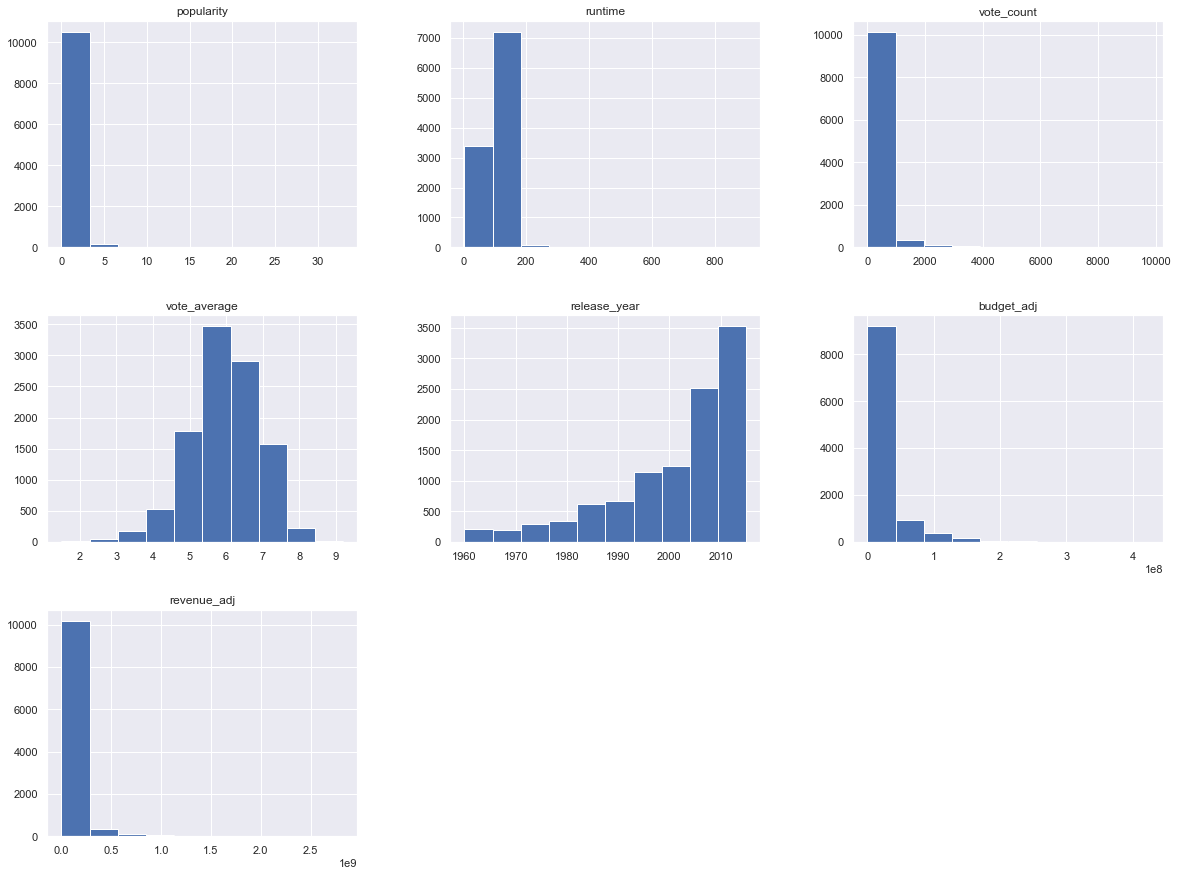

In [543]:
dff.hist(figsize=(20,15))

### 1) What were the 10 movies that got the most audience votes and highest average vote scores?, And, Will I get the same results if I change the order and I set the votes averages first?


In [544]:
dff_vote=dff[['original_title','vote_average', 'vote_count']]
dff_vote_10 = dff_vote.sort_values(by=['vote_count','vote_average'],ascending=False)[:10]
dff_vote_10

,original_title,vote_average,vote_count
1919,Inception,7.9,9767
4361,The Avengers,7.3,8903
1386,Avatar,7.1,8458
2875,The Dark Knight,8.1,8432
4364,Django Unchained,7.7,7375
4382,The Hunger Games,6.7,7080
5425,Iron Man 3,6.9,6882
4363,The Dark Knight Rises,7.5,6723
629,Interstellar,8.0,6498
4367,The Hobbit: An Unexpected Journey,6.9,6417


In [545]:
dff_vote_avg_10 = dff_vote.sort_values(by=['vote_average', 'vote_count'],ascending=False)[:10]
dff_vote_avg_10

,original_title,vote_average,vote_count
3894,The Story of Film: An Odyssey,9.2,14
1200,Black Mirror: White Christmas,8.8,41
6911,Pink Floyd: Pulse,8.7,23
3690,The Art of Flight,8.5,60
8839,Dave Chappelle: Killin' Them Softly,8.5,17
8411,Queen - Rock Montreal,8.5,14
8221,A Personal Journey with Martin Scorsese Throug...,8.5,11
4178,The Shawshank Redemption,8.4,5754
609,The Jinx: The Life and Deaths of Robert Durst,8.4,72
5923,Tropico,8.4,24


## So according to the results, It is interesting that I've got different results and in fact, movies with less audiences votes, had greater scores on average of audience. 

--------------

### 2) Are the movies getting more profits over the years?

<ipython-input-546-e3e9970e0945>:16: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



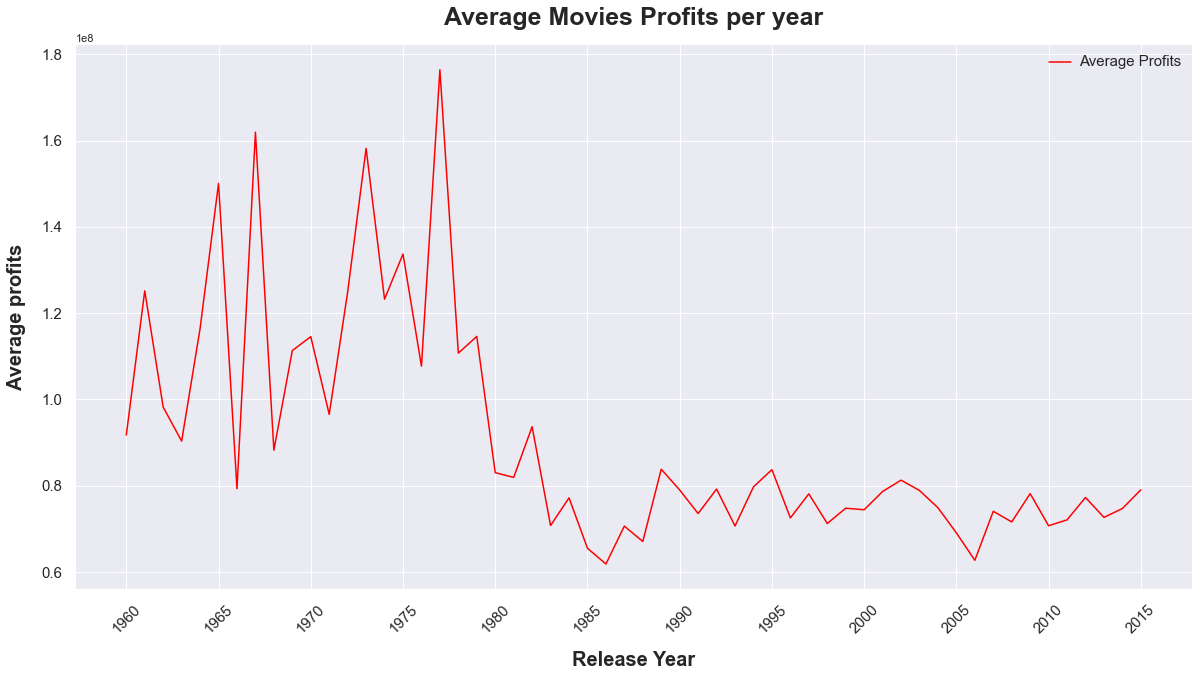

In [546]:
#First I´m going to create a profit column to prepare the data for the visualization.
dff['profits'] = dff.revenue_adj - dff.budget_adj
df_profits = dff[['original_title','release_year', 'profits']]
# Now, I´m going to calculate the mean profit per year to analyze the situation: 
fig, ax = plt.subplots(figsize=(20,10))
df_profits.groupby(by="release_year").mean().plot(color = 'red', ax=ax)
ax.set_title('Average Movies Profits per year',weight='bold',size=25, pad = 20)
ax.tick_params(labelsize=15,length=10)
ax.set_xlabel('Release Year',labelpad = 15 ,weight='bold', size=20)
ax.set_ylabel('Average profits',labelpad = 15, weight='bold',size=20)
plt.xticks(np.arange(1960, 2016, step=5))
plt.xticks(rotation=45)
ax.legend(['Average Profits'], frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
sns.despine(left=True)
fig.show()

## So, according to the above graph, It is interesting to observe that over the years, on average, movies have been reducing their profits. 

-----------------------------------

## 3) Is there any relationship between budget per movie and vote average? 

In [547]:
dff_budget =dff[['profits','budget_adj','vote_average']]
dff_budget.describe()

,profits,budget_adj,vote_average
count,1.073100e+04,1.073100e+04,10731.000000
mean,7.822069e+07,3.694033e+07,5.964710
std,1.209392e+08,2.909056e+07,0.930283
min,-4.139124e+08,9.210911e-01,1.500000
25%,2.274402e+07,2.424523e+07,5.400000
50%,7.821182e+07,3.688907e+07,6.000000
75%,7.821182e+07,3.688907e+07,6.600000
max,2.750137e+09,4.250000e+08,9.200000


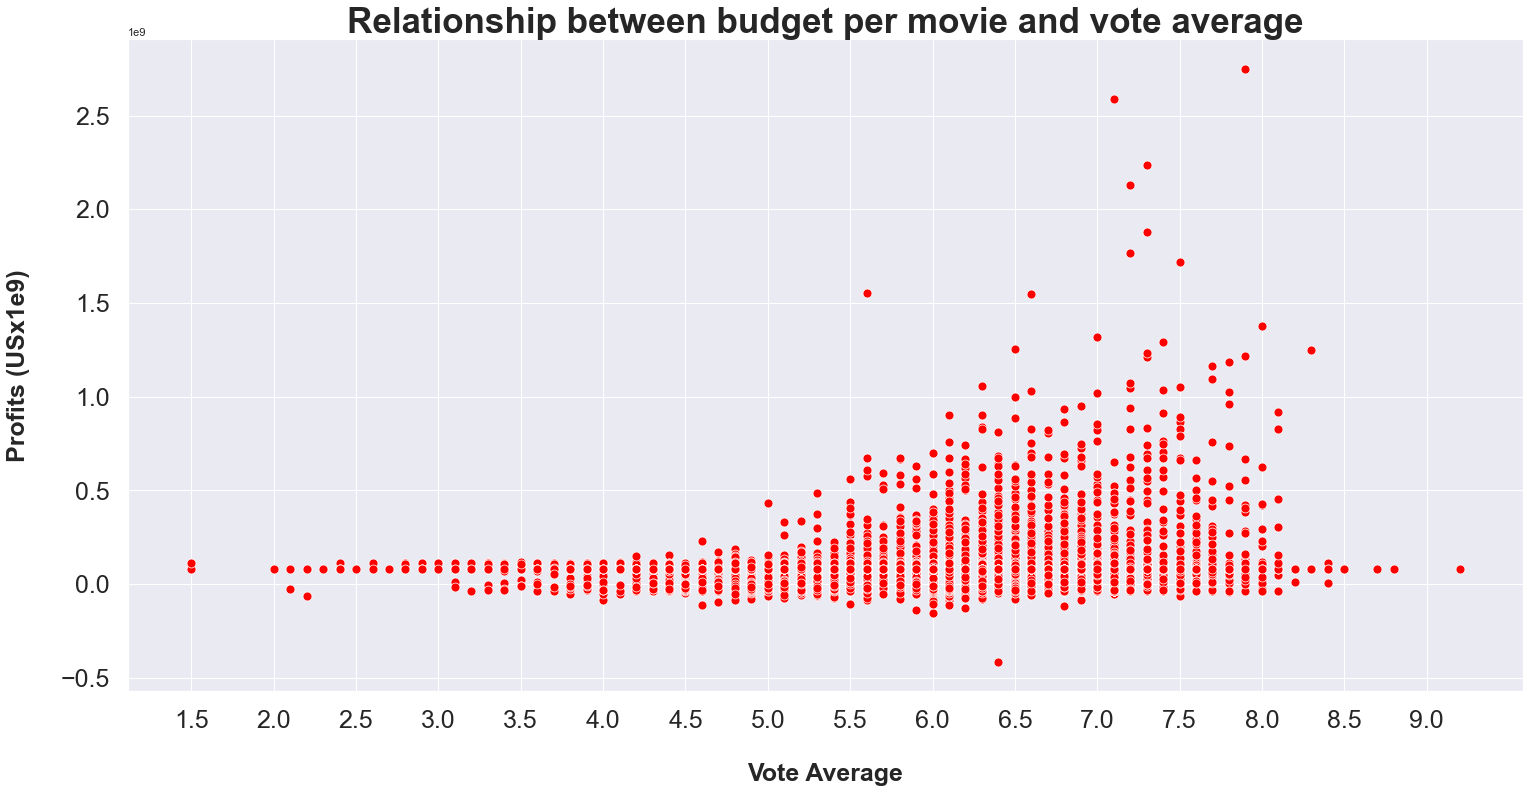

In [548]:
fig, ax = plt.subplots(figsize = ( 25 , 12 )) 
sns.set(style='darkgrid')
sns.scatterplot(x='vote_average', y='profits', data=dff_budget, color = 'red', ci = None, s= 80, ax = ax);
ax.set_xlabel( "Vote Average" , labelpad = 30 ,weight='bold',size = 25 ) 
# Set label for y-axis 
ax.set_ylabel( "Profits (USx1e9)" , labelpad = 30 ,weight='bold', size = 25 ) 
# Set title for plot 
ax.set_title( "Relationship between budget per movie and vote average" , weight='bold',size = 35 ) 
plt.xticks(np.arange(1.5, 9.5, step=0.5))
ax.tick_params(labelsize=25,length=15)
plt.show() 

### According to the above graph, it is very interesting to observe that even though there are movies with high 'Vote average' (greater than 5.5 at least), many of them haven´t got any profits. In fact, they lost money. Bur there are several others, that had high vote average and great profits. It is important to notice that movies with votes average greater than 8.4, didn't get much profits in relation to films that had less vote average. 












--------------------------

## 4) What´s the percentage of movies that had negative, cero and positive profits?

In [549]:
# create a list of our conditions
conditions = [
    (dff['profits'] > 0),
    (dff['profits'] == 0 ),
    (dff['profits'] < 0)
    ]

# create a list of the values we want to assign for each condition
values = ['Positive', 'Zero', 'Negative']

# create a new column and use np.select to assign values to it using our lists as arguments
dff['profits_class'] = np.select(conditions, values)

# display updated DataFrame
dff.head()



,id,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,profits_class
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,06/09/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Positive
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,05/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Positive
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,03/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,Positive
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,Positive
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,04/01/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,Positive


In [550]:
dff3= dff[['profits_class','profits']]
dff3

,profits_class,profits
0,Positive,1.254446e+09
1,Positive,2.101614e+08
2,Positive,1.704191e+08
3,Positive,1.718723e+09
4,Positive,1.210949e+09
...,...,...
10861,Positive,7.821182e+07
10862,Positive,7.821182e+07
10863,Positive,7.821182e+07
10864,Positive,7.821182e+07


In [551]:
prob = dff3['profits_class'].value_counts(normalize=True)
prob

Positive    0.829466
Negative    0.170254
Zero        0.000280
Name: profits_class, dtype: float64

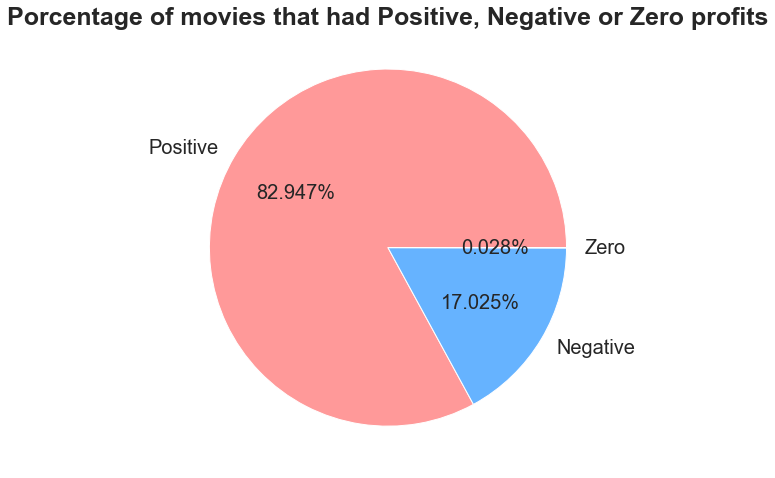

In [552]:
threshold = 0.099
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['Zero'] = tail_prob
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99']
fig, ax = plt.subplots(figsize=(8, 18))
prob.plot(kind='pie', y = 'profits_class',explode = explode, colors=colors, fontsize=20, ax = ax,autopct='%1.3f%%', shadow = False, )
plt.xticks(rotation=45)
ax.set_ylabel( ' ') 
# Set title for plot 
#plt.title('Porcentage of movies that had Positive, Negative or Zero profits', size = 20)
ax.set_title('Porcentage of movies that had Positive, Negative or Zero profits', weight='bold',size=25, pad = 0.0001)
#ax.axis('equal')
plt.show()


### So, according to the Pie chart showed above, 82,947% of movies have had profits, 17,025% of movies have  lost money and 0,028 have obteined Zero profits (at least didn´t lost money)

-----------------------

# Conclusions

## Results

1.-The first thing I wonder was what were the 10 movies that got the most audience votes and highest average vote scores and, Will I get the same results if I change the order and I set the votes averages first. The answer was that movies with less audiences votes (or votes counts), had greater vote average. And, in the other side, movies with greater vote average, did not have much vote counts. For example, the movie "Inception" (this movie had the highest vote count) had an 'vote_average' of 7.9 and 'vote_count' equals to 9767. Instead, the movie "The Story of Film: An Odyssey" (this movie had the highest vote average) had an 'vote_average' of 9.2 and 'vote_count' equals to 14. 

2.-Then I wondered if on average and over the years, movies are increasing or reducing their profits. And the results is that, on average, movie productions have had reduced ther profits over the years.

3.- Afterward I wonder if there was any relationship between budget per movie and vote average. And the answer was that even though there are movies with high 'Vote average' (greater than 5.5 at least), many of them haven´t got any profits. In fact, they lost money. Bur there are several others, that had high vote average and great profits. It is important to notice that movies with votes average greater than 8.4, didn't get much profits in relation to films that had less vote average. 


4.- Finally, I wonder if all movie production have had profits. And according to the Pie chart showed above, 82,947% of movies have had profits, 17,025% of movies have lost money and 0,028 have obteined Zero profits (at least didn´t lost money)

## Limitations:
1.- I had problems changing release_date to a data type format, because all dates before 1969, pandas datetime library, transforms those dates 100 years greater. I didn´t know how to do it better.

2.- Analyzing statistics, I realized that this columns: budget_adj, revenue_adj and runtime, contained many zero values. I Filled these zero values with the mean value of each column. I thing I could´ve solved this situation in a different way but I was not sure what to do. An this situation it is very important, because most of my Exploratory Data Analysis was done using this information.

---------------------------